# Connect-4 Classification
_____

Dataset : https://archive.ics.uci.edu/ml/datasets/Connect-4 

This database contains all legal 8-ply positions in the game of connect-4 in which neither player has won yet, and in which the next move is not forced. 

x is the first player; o the second. 

The outcome class is the game theoretical value for the first player.

Attribute Information: (x=player x has taken, o=player o has taken, b=blank) 

The board is numbered like: 
<pre>
6 . . . . . . . 
5 . . . . . . . 
4 . . . . . . . 
3 . . . . . . . 
2 . . . . . . . 
1 . . . . . . . 
a b c d e f g 


1. a1: {x,o,b} 
2. a2: {x,o,b} 
3. a3: {x,o,b} 
4. a4: {x,o,b} 
5. a5: {x,o,b} 
6. a6: {x,o,b} 
7. b1: {x,o,b} 
8. b2: {x,o,b} 
9. b3: {x,o,b} 
10. b4: {x,o,b} 
11. b5: {x,o,b} 
12. b6: {x,o,b} 
13. c1: {x,o,b} 
14. c2: {x,o,b} 
15. c3: {x,o,b} 
16. c4: {x,o,b} 
17. c5: {x,o,b} 
18. c6: {x,o,b} 
19. d1: {x,o,b} 
20. d2: {x,o,b} 
21. d3: {x,o,b} 
22. d4: {x,o,b} 
23. d5: {x,o,b} 
24. d6: {x,o,b} 
25. e1: {x,o,b} 
26. e2: {x,o,b} 
27. e3: {x,o,b} 
28. e4: {x,o,b} 
29. e5: {x,o,b} 
30. e6: {x,o,b} 
31. f1: {x,o,b} 
32. f2: {x,o,b} 
33. f3: {x,o,b} 
34. f4: {x,o,b} 
35. f5: {x,o,b} 
36. f6: {x,o,b} 
37. g1: {x,o,b} 
38. g2: {x,o,b} 
39. g3: {x,o,b} 
40. g4: {x,o,b} 
41. g5: {x,o,b} 
42. g6: {x,o,b} 
43. Class: {win,loss,draw}
</pre>

In [6]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [7]:
index=[]
board = ['a','b','c','d','e','f','g']
for i in board:
    for j in range(6):
        index.append(i + str(j+1))

In [8]:
column_names  = index +['Class']

In [9]:
# read .csv from provided dataset
csv_filename="connect-4.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names= column_names)

In [10]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [11]:
df['Class'].unique()

array(['win', 'draw', 'loss'], dtype=object)

In [12]:
#Convert animal labels to numbers
le = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [14]:
for col in df.columns:
    df[col] = pd.get_dummies(df[col])

In [15]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,Class
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [16]:
X = df[index]
y = df['Class']

In [17]:
X.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [18]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [22]:
print (X_train.shape, y_train.shape)

(40534, 42) (40534,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

In [25]:
features = index

Feature ranking:
1. feature 24 - e1 (0.065720) 
2. feature 18 - d1 (0.065125) 
3. feature 19 - d2 (0.063892) 
4. feature 30 - f1 (0.059698) 
5. feature 6 - b1 (0.058818) 
6. feature 12 - c1 (0.054548) 
7. feature 36 - g1 (0.051978) 
8. feature 13 - c2 (0.051923) 
9. feature 25 - e2 (0.041976) 
10. feature 0 - a1 (0.039567) 
11. feature 7 - b2 (0.038988) 
12. feature 31 - f2 (0.037212) 
13. feature 1 - a2 (0.032235) 
14. feature 20 - d3 (0.030173) 
15. feature 14 - c3 (0.029111) 
16. feature 37 - g2 (0.029028) 
17. feature 32 - f3 (0.023717) 
18. feature 2 - a3 (0.023221) 
19. feature 8 - b3 (0.022005) 
20. feature 3 - a4 (0.020436) 
21. feature 38 - g3 (0.019726) 
22. feature 26 - e3 (0.018618) 
23. feature 15 - c4 (0.013379) 
24. feature 39 - g4 (0.012765) 
25. feature 21 - d4 (0.012557) 
26. feature 33 - f4 (0.010049) 
27. feature 9 - b4 (0.009960) 
28. feature 4 - a5 (0.009011) 
29. feature 27 - e4 (0.008681) 
30. feature 40 - g5 (0.008212) 
31. feature 16 - c5 (0.005241) 
32. featu

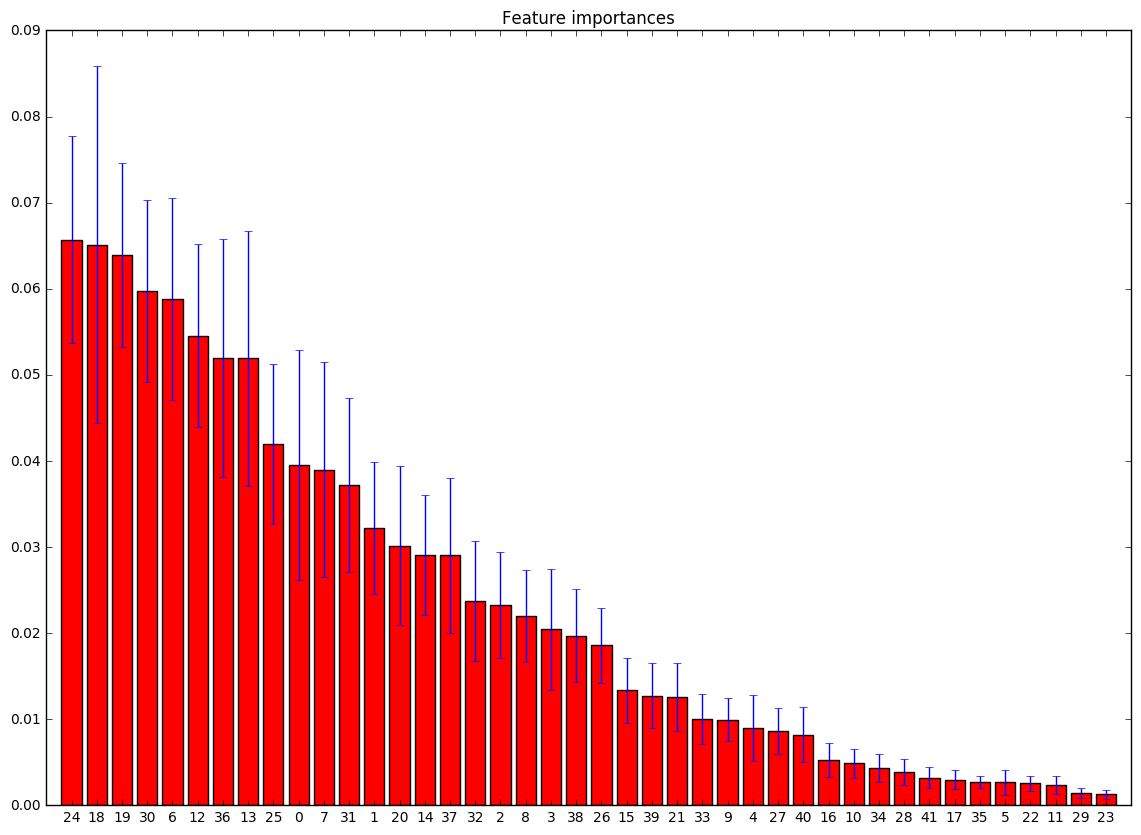

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
importances[indices[:5]]

array([ 0.06571997,  0.06512489,  0.06389193,  0.0596978 ,  0.05881837])

In [28]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 24 - e1 (0.065720)
2. feature 18 - d1 (0.065125)
3. feature 19 - d2 (0.063892)
4. feature 30 - f1 (0.059698)
5. feature 6 - b1 (0.058818)


In [29]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

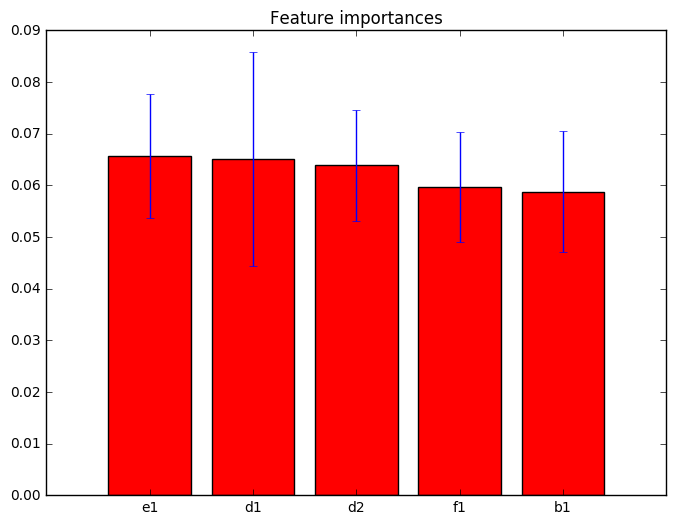

In [30]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [31]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.904340746771
time elapsed:  0.25101423263549805


## cross validation for DT

In [32]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X, y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.90341918  0.90282712  0.89661042  0.88535268  0.59970392]
0.837582663714
time elapsed:  1.5280873775482178


### Tuning our hyperparameters using GridSearch

In [33]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (2, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)


print (classification_report(y_test, predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   11.3s finished


Best score: 0.016
Best parameters set:
	clf__max_depth: 25
	clf__min_samples_leaf: 1
	clf__min_samples_split: 2
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     24464
          1       0.10      0.00      0.00      2559

avg / total       0.83      0.90      0.86     27023



# Exporting Decision Tree to an Image

In [35]:
t0=time()
print ("DecisionTree")

dt1 = DecisionTreeClassifier(min_samples_split=2,max_depth=25,min_samples_leaf=1, random_state=99)

clf_dt1=dt1.fit(X_train,y_train)

print ("Acurracy: ", clf_dt1.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

export_graphviz(clf_dt1, 
                out_file='tree.dot', 
                feature_names=features)

DecisionTree
Acurracy:  0.903600636495
time elapsed:  0.23401331901550293


After we have installed GraphViz on our computer, we can convert the tree.dot file into a PNG file by executing the following command from the command line in the location where we saved the tree.dot file:

> dot -Tpng tree.dot -o tree.png

# Random Forest accuracy and time elapsed caculation

In [36]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.902712504163
time elapsed:  2.1101207733154297


## cross validation for RF

In [37]:
tt2=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X, y, cv=5)
print (scores)
print (scores.mean())
tt3=time()
print ("time elapsed: ", tt3-tt2)

cross result========
[ 0.90216104  0.90223505  0.89779455  0.88675894  0.70288675]
0.858367266614
time elapsed:  11.505658149719238


### Tuning Models using GridSearch

In [39]:
pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (2, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)

print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, predictions))
print (classification_report(y_test, predictions))
    

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.8min finished


Best score: 0.904
Best parameters set:
	clf__max_depth: 5
	clf__min_samples_leaf: 1
	clf__min_samples_split: 2
	clf__n_estimators: 5
Accuracy: 0.905302890131
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     24464
          1       0.00      0.00      0.00      2559

avg / total       0.82      0.91      0.86     27023



# Naive Bayes accuracy and time elapsed caculation


In [40]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.903637642009
time elapsed:  0.32901859283447266


## cross-validation for NB

In [41]:
tt4=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print (scores)
print (scores.mean())
tt5=time()
print ("time elapsed: ", tt5-tt4)

cross result========
[ 0.90031083  0.90257116  0.89150902]
0.898130337318
time elapsed:  2.033116340637207


# KNN accuracy and time elapsed caculation

In [42]:
t6=time()
print( "KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.885319912667
time elapsed:  45.90462565422058


## cross validation for KNN

In [43]:
tt6=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt7=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.88521314  0.86486086  0.8633807   0.81822219  0.81828275]
0.849991929954
time elapsed:  137.34885597229004


### Fine tuning the model using GridSearch

In [44]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,10]}

grid = grid_search.GridSearchCV(knn, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print ('Best score: %0.3f' % grid.best_score_)

print ('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid.predict(X_test)
print (classification_report(y_test, predictions))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.7min finished


Best score: 0.903
Best parameters set:
	n_neighbors: 10
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     24464
          1       0.40      0.00      0.00      2559

avg / total       0.86      0.91      0.86     27023



# SVM accuracy and time elapsed caculation

In [46]:
t7=time()
print ("SVM")

svc = SVC(kernel='rbf')
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.905302890131
time elapsed:  74.45425868034363


## cross validation for SVM

In [49]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc,X,y, cv=5)
print (scores)
print (scores.mean())
tt8=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.90452931  0.90452931  0.90452931  0.90452224  0.90458919]
0.904539871235
time elapsed:  2417.2702600955963


____